In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

<h1>Reading the Data</h1>

In [2]:
# Reading data from folder 'data'
df = pd.read_csv('../data/Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<h1>Understanding the Data</h1>

In [3]:
# Data shape 
print("Row x Column: ", df.shape, end='\n \n')

Row x Column:  (167, 10)
 


In [4]:
# Data summary descriptive statistic
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Data column types and check NaN value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Check NaN value (2)
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [7]:
# Check if column Negara is unique and have proved that the data have been grouped by Negara
print(df.shape[0] == len(df.Negara.unique()))

True


<h1>Univariate Analysis</h1>

<Figure size 864x576 with 0 Axes>

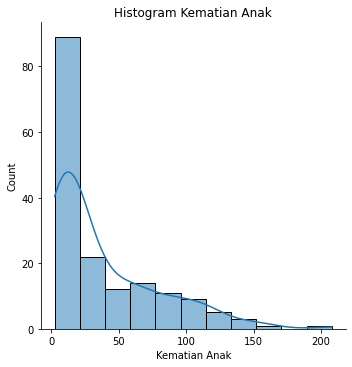

In [8]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Kematian_anak'], kde=True)

# Change title='Histogram Kematian Anak', xlabel='Kematian Anak' and ylabel='Count'
plt.title('Histogram Kematian Anak')
plt.xlabel('Kematian Anak')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data kematian anak **skew ke kanan** (modus < mean)
2. Persebaran data kematian anak **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 0-50**
3. Jumlah angka kematian anak **tertinggi** terdapat pada **rentang 0-50** sebanyak **lebih dari 80**
4. Jumlah angka kematian anak **terendah** terdapat pada **rentang 150-200** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

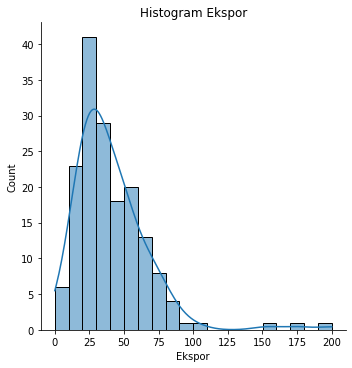

In [9]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Ekspor'], kde=True)

# Change title='Histogram Ekspor', xlabel='Ekspor' and ylabel='Count'
plt.title('Histogram Ekspor')
plt.xlabel('Ekspor')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data ekspor **skew ke kanan** (modus < mean)
2. Persebaran data ekspor **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 12-75**
3. Jumlah angka ekspor **tertinggi** terdapat pada **rentang 25** sebanyak **40**
4. Jumlah angka ekspor **terendah** terdapat pada **rentang 100-200** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

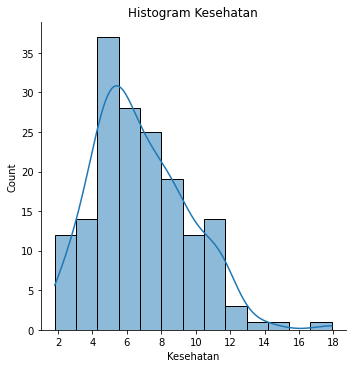

In [10]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Kesehatan'], kde=True)

# Change title='Histogram Kesehatan', xlabel='Kesehatan' and ylabel='Count'
plt.title('Histogram Kesehatan')
plt.xlabel('Kesehatan')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data kesehatan **skew ke kanan** (modus < mean)
2. Persebaran data kesehatan **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 5-9**
3. Jumlah angka kesehatan **tertinggi** terdapat pada **rentang 5** sebanyak **lebih dari 35**
4. Jumlah angka kesehatan **terendah** terdapat pada **rentang 13-18** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

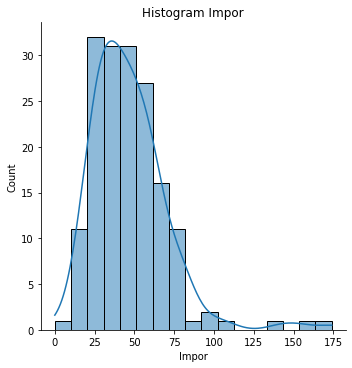

In [11]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Impor'], kde=True)

# Change title='Histogram Impor', xlabel='Impor' and ylabel='Count'
plt.title('Histogram Impor')
plt.xlabel('Impor')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data impor **skew ke kanan** (modus < mean)
2. Persebaran data impor **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 12-75**
3. Jumlah angka impor **tertinggi** terdapat pada **rentang 25 - 50** sebanyak **lebih dari 30**
4. Jumlah angka impor **terendah** terdapat pada **rentang 0-12 dan 80-175** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

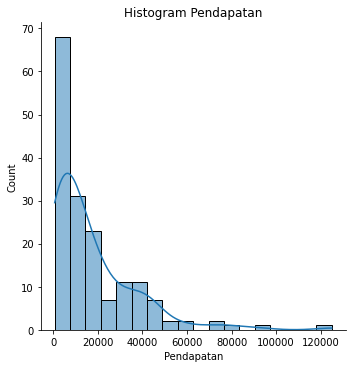

In [12]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Pendapatan'], kde=True)

# Change title='Histogram Pendapatan', xlabel='Pendapatan' and ylabel='Count'
plt.title('Histogram Pendapatan')
plt.xlabel('Pendapatan')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data pendapatan **skew ke kanan** (modus < mean)
2. Persebaran data pendapatan **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 0-20000**
3. Jumlah angka pendapatan **tertinggi** terdapat pada **rentang 0-10000** sebanyak **lebih dari 60**
4. Jumlah angka pendapatan **terendah** terdapat pada **rentang 50000-120000** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

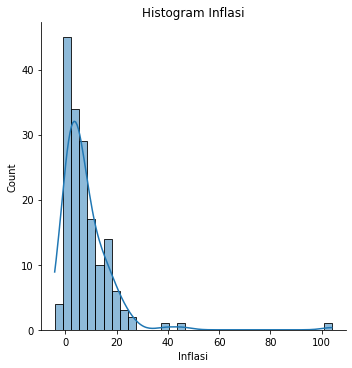

In [13]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Inflasi'], kde=True)

# Change title='Histogram Inflasi', xlabel='Inflasi' and ylabel='Count'
plt.title('Histogram Inflasi')
plt.xlabel('Inflasi')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data inflasi **skew ke kanan** (modus < mean)
2. Persebaran data inflasi **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 0-10**
3. Jumlah angka inflasi **tertinggi** terdapat pada **rentang 5** sebanyak **lebih dari 40**
4. Jumlah angka inflasi **terendah** terdapat pada **rentang 20-110** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

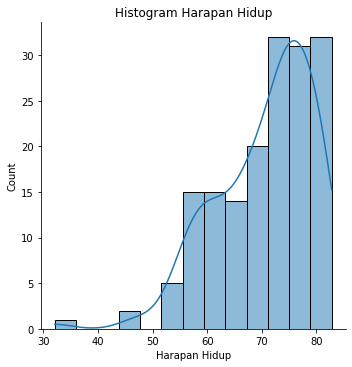

In [14]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Harapan_hidup'], kde=True)

# Change title='Histogram Harapan Hidup', xlabel='Harapan Hidup' and ylabel='Count'
plt.title('Histogram Harapan Hidup')
plt.xlabel('Harapan Hidup')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data harapan hidup **skew ke kiri** (modus > mean)
2. Persebaran data harapan hidup **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 70-85**
3. Jumlah angka harapan hidup **tertinggi** terdapat pada **rentang 70-85** sebanyak **lebih dari 30**
4. Jumlah angka harapan hidup **terendah** terdapat pada **rentang 30-50** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

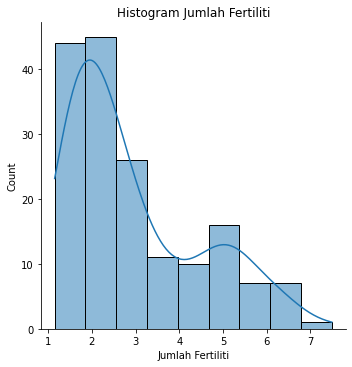

In [15]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['Jumlah_fertiliti'], kde=True)

# Change title='Histogram Jumlah Fertiliti', xlabel='Jumlah Fertiliti' and ylabel='Count'
plt.title('Histogram Jumlah Fertiliti')
plt.xlabel('Jumlah Fertiliti')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data jumlah fertiliti **skew ke kanan** (modus < mean)
2. Persebaran data jumlah fertiliti **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 1-3**
3. Jumlah angka jumlah fertiliti **tertinggi** terdapat pada **rentang 1-3** sebanyak **lebih dari 40**
4. Jumlah angka jumlah fertiliti **terendah** terdapat pada **rentang 7** sebanyak **mendekati 0**

<Figure size 864x576 with 0 Axes>

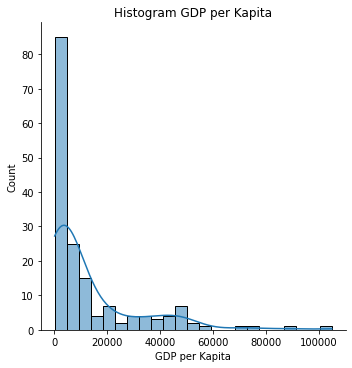

In [16]:
# Create canvas
plt.figure(figsize=(12,8))

# Plotting data into histogram plot
sns.displot(df['GDPperkapita'], kde=True)

# Change title='Histogram GDP per Kapita', xlabel='GDP per Kapita' and ylabel='Count'
plt.title('Histogram GDP per Kapita')
plt.xlabel('GDP per Kapita')
plt.ylabel('Count')

plt.show()

Analysis: 
1. Persebaran data GDP per kapita **skew ke kanan** (modus < mean)
2. Persebaran data GDP per kapita **sebagian besar** (> 50% (~ 83)) tersebar pada **rentang 0-5000**
3. Jumlah angka GDP per kapita **tertinggi** terdapat pada **rentang 0-5000** sebanyak **lebih dari 80**
4. Jumlah angka GDP per kapita **terendah** terdapat pada **rentang 60000-120000** sebanyak **mendekati 0**

<h1>Multivariate Analysis</h1>

<AxesSubplot:>

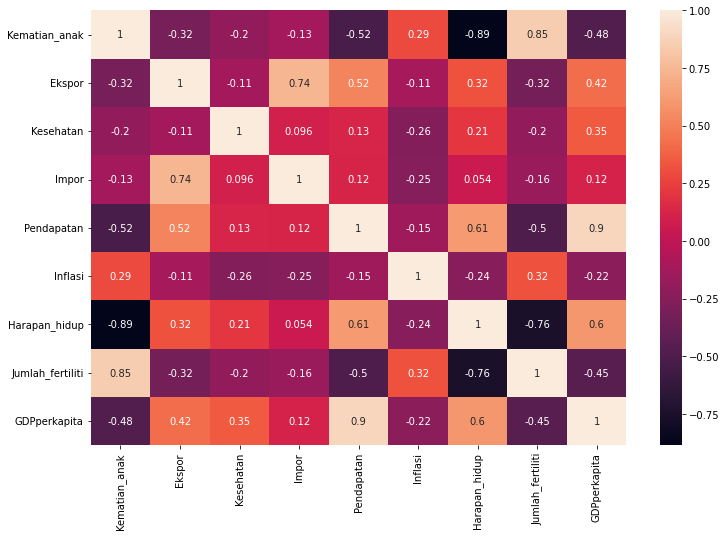

In [17]:
# plotting dataframe
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(), annot =True, fmt='.2g')

Analysis: 
1. Kolom **Kematian_anak** dengan kolom **Jumlah_fertiliti** memiliki hubungan korelasi yang **kuat** dengan **angka korelasi 0.85**
2. Kolom **Ekspor** dengan kolom **Impor** memiliki hubungan korelasi yang **kuat** dengan **angka korelasi 0.74**
3. Kolom **Pendapatan** dengan kolom **GDPperkapita** memiliki hubungan korelasi yang **kuat** dengan **angka korelasi 0.9**

Retrieved data for deep analysis: 
- GDPperkapita x Pendapatan
- Jumlah_fertiliti x Kematian_anak
- Ekspor x Impor

<h1>Handling Outliers</h1>

<h1>Scaling Data</h1>

<h1>Elbow Method</h1>

<h1>X-Means Clustering</h1>